In [3]:
# Just in case a reload is required
from importlib import reload

import dill
import matplotlib.pyplot as plt
import numpy as np

import energy
import store

In [4]:
job_data: store.JobData = store.load_job_data("782d95")

In [6]:
fci_energies = []
qsci_energies = []
correct_proportions = []
for molecule, result in zip(job_data.molecules, job_data.results):
    fci, qsci, correct_proportion = energy.calculate_energy_ladders(molecule, result)
    fci_energies.append(fci)
    qsci_energies.append(qsci)
    correct_proportions.append(correct_proportion)


Percentage of measurements in the correct particle sector:  15.625 %

Percentage of measurements in the correct particle sector:  15.741 %

Percentage of measurements in the correct particle sector:  23.193 %

Percentage of measurements in the correct particle sector:  21.680 %

Percentage of measurements in the correct particle sector:  23.248 %

Percentage of measurements in the correct particle sector:  22.388 %

Percentage of measurements in the correct particle sector:  14.813 %

Percentage of measurements in the correct particle sector:  22.662 %

Percentage of measurements in the correct particle sector:  22.192 %

Percentage of measurements in the correct particle sector:  20.624 %

Percentage of measurements in the correct particle sector:  15.295 %

Percentage of measurements in the correct particle sector:  12.421 %

Percentage of measurements in the correct particle sector:  12.537 %

Percentage of measurements in the correct particle sector:  14.209 %

Percentage of measu

In [3]:
data_path = store.job_data_path(job_data.job_id)

In [4]:
molecule = job_data.molecules[0]

In [6]:
qsci_stretch = np.array(list(zip(*qsci_energies)))
fci_stretch = np.array(list(zip(*fci_energies)))
qsci_error = qsci_stretch - fci_stretch

In [16]:
with open(data_path / "qsci_error.pkl", 'wb') as file:
    dill.dump(qsci_error, file)
with open(data_path / "qsci_energies.pkl", 'wb') as file:
    dill.dump(qsci_stretch, file)
with open(data_path / "fci_energies.pkl", 'wb') as file:
    dill.dump(fci_stretch, file)
with open(data_path / "correct_particle_number.pkl", 'wb') as file:
    dill.dump(fci_stretch, file)

In [5]:
import dill
with open(data_path / "qsci_energies.pkl", 'rb') as file:
    qsci_energies = dill.load(file)
with open(data_path / "fci_energies.pkl", 'rb') as file:
    fci_energies = dill.load(file)
with open(data_path / "correct_particle_number.pkl", 'rb') as file:
    qsci_energies_loaded = dill.load(file)
# with open(data_path / "qsci_error.pkl", 'rb') as file:
#     qsci_error = dill.load(file)
qsci_error = qsci_stretch - fci_stretch

NameError: name 'data_path' is not defined

In [13]:
bond_lengths = []
for mol in job_data.molecules:
    bond_lengths.append((round(mol.geometry[1][1][2], 1)))

ValueError: x and y must have same first dimension, but have shapes (51,) and (7,)

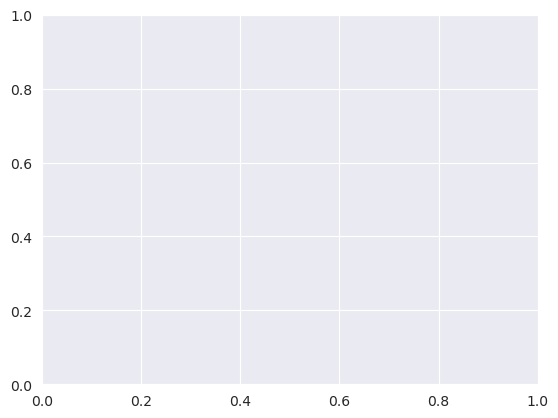

In [14]:
fig1 = plt.figure()
for i, state in enumerate(qsci_error):
    plt.plot(bond_lengths, state, label=str(i))
plt.axhline(0.043, color='black')
plt.legend()
plt.xlabel('Bond Length (Angstrom)')
plt.ylabel('Error (eV)')
plt.title('LiH Bond Stretch QSCI')
plt.show()

In [14]:
import seaborn as sns
sns.set()

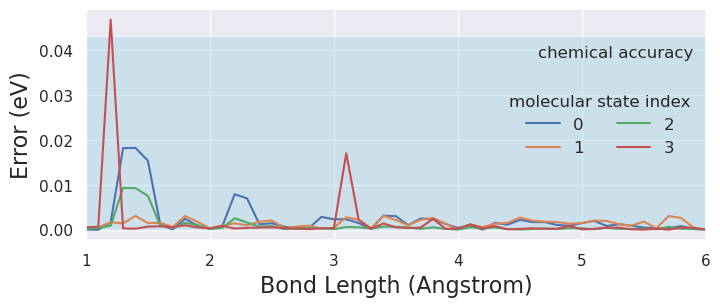

In [50]:
fig2 = plt.figure(figsize=(8, 3))
for i, state in enumerate(qsci_error[:-3]):
    plt.plot(bond_lengths, state, label=str(i))

chemical_accuracy = 0.043
# plt.axhline(chemical_accuracy, color='black')

plt.xlabel('Bond Length (Angstrom)', fontsize=16)
plt.ylabel('Error (eV)', fontsize=16)
# plt.title('LiH Bond Stretch QSCI', fontsize=20)
plt.xlim(1, 6)

ax = plt.gca()
ax.axhspan(ymin=0, ymax=chemical_accuracy, facecolor='lightblue', alpha=0.5)
ax.text(5.9, 0.041, 'chemical accuracy', ha='right', va='top', fontsize=12, alpha=1)

plt.legend(ncol=2, fontsize=12, title="molecular state index", framealpha=0)

plt.savefig(data_path / "LiH_bond_stretch_error.svg", transparent=True)
plt.show()

In [16]:
qsci_stretch = np.array(list(zip(*qsci_energies)))
fci_stretch = np.array(list(zip(*fci_energies)))
qsci_pes = qsci_stretch - np.min(qsci_stretch)
fci_pes = fci_stretch - np.min(fci_stretch)

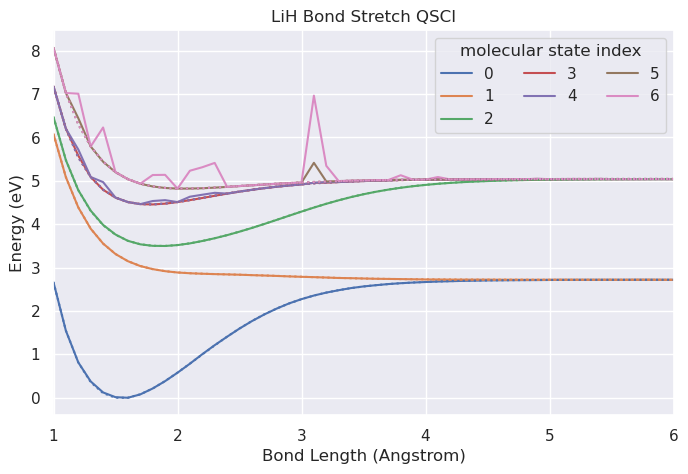

In [24]:
fig3 = plt.figure(figsize=(8, 5))
# for i, state in enumerate(qsci_pes[0]):
#     plt.plot(bond_lengths, state, label=str(i))

for i, state in enumerate(qsci_stretch):
    plt.plot(bond_lengths, qsci_pes[i], label=str(i))

plt.legend(ncol=3, title="molecular state index")

# Reset colour cycle so FCI and QSCI colours correspond
plt.gca().set_prop_cycle(None)
for i, state in enumerate(fci_pes):
    plt.plot(bond_lengths, state, ':', label=str(i))

plt.xlabel('Bond Length (Angstrom)')
plt.ylabel('Energy (eV)')
plt.title('LiH Bond Stretch QSCI')
plt.xlim(1, 6)

plt.savefig(data_path / "LiH_bond_stretch_pes.svg", transparent=True)

plt.show()

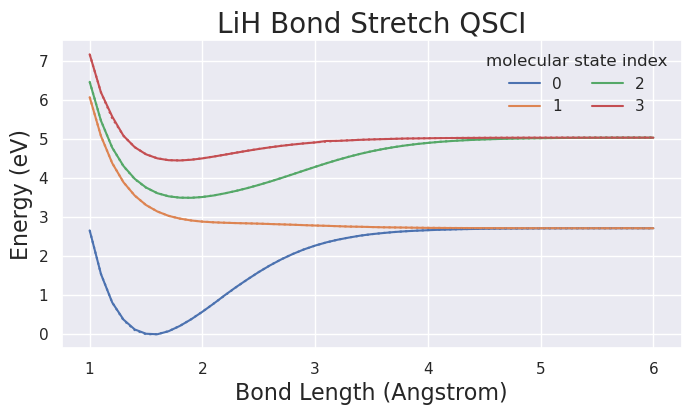

In [35]:
fig3 = plt.figure(figsize=(8, 4))
# for i, state in enumerate(qsci_pes[0]):
#     plt.plot(bond_lengths, state, label=str(i))

for i, state in enumerate(qsci_stretch[:4]):
    plt.plot(bond_lengths, qsci_pes[i], label=str(i))
plt.legend(ncol=2, title="molecular state index", framealpha=0)

# Reset colour cycle so FCI and QSCI colours correspond
plt.gca().set_prop_cycle(None)
for i, state in enumerate(fci_pes[:4]):
    plt.plot(bond_lengths, state, ':', label=str(i))

plt.xlabel('Bond Length (Angstrom)', fontsize=16)
plt.ylabel('Energy (eV)', fontsize=16)
plt.title('LiH Bond Stretch QSCI', fontsize=20)

plt.savefig(data_path / "LiH_bond_stretch_pes.svg", transparent=True)

plt.show()